# Kelompok 3
1. MUH. HILMY FAHRIZAL (125)
2. MUHAMMAD ABDILLAH CAESAR (245)
3. THEOPAN GERARD N (227)

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
!pip install scikit-learn -U


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
support2 = fetch_ucirepo(id=880)

# data (as pandas dataframes)
X = support2.data.features
y = support2.data.targets

# metadata
print(support2.metadata)

# variable information
print(support2.variables)


{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

In [4]:
df=pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        9105 non-null   int64  
 1   age       9105 non-null   float64
 2   death     9105 non-null   int64  
 3   sex       9105 non-null   object 
 4   hospdead  9105 non-null   int64  
 5   slos      9105 non-null   int64  
 6   d.time    9105 non-null   int64  
 7   dzgroup   9105 non-null   object 
 8   dzclass   9105 non-null   object 
 9   num.co    9105 non-null   int64  
 10  edu       7471 non-null   float64
 11  income    6123 non-null   object 
 12  scoma     9104 non-null   float64
 13  charges   8933 non-null   float64
 14  totcst    8217 non-null   float64
 15  totmcst   5630 non-null   float64
 16  avtisst   9023 non-null   float64
 17  race      9063 non-null   object 
 18  sps       9104 non-null   float64
 19  aps       9104 non-null   float64
 20  surv2m    9104 non-null   floa

In [5]:
df=df.drop(columns=['id','hospdead','sfdm2','slos','d.time'])
df.isna().sum()


age            0
death          0
sex            0
dzgroup        0
dzclass        0
num.co         0
edu         1634
income      2982
scoma          1
charges      172
totcst       888
totmcst     3475
avtisst       82
race          42
sps            1
aps            1
surv2m         1
surv6m         1
hday           0
diabetes       0
dementia       0
ca             0
prg2m       1649
prg6m       1633
dnr           30
dnrday        30
meanbp         1
wblc         212
hrt            1
resp           1
temp           1
pafi        2325
alb         3372
bili        2601
crea          67
sod            1
ph          2284
glucose     4500
bun         4352
urine       4862
adlp        5641
adls        2867
adlsc          0
dtype: int64

In [11]:
desc_stats = df.describe()
desc_stats

,age,death,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
count,9105.000000,9105.000000,9105.000000,7471.000000,9104.000000,8.933000e+03,8217.000000,5630.000000,9023.000000,9104.000000,...,6504.000000,9038.000000,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6238.000000,9105.000000
mean,62.650823,0.681054,1.868644,11.747691,12.058546,5.999579e+04,30825.867768,28828.877838,22.610928,25.525872,...,2.554463,1.770961,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.637384,1.888272
std,15.593710,0.466094,1.344409,3.447743,24.636694,1.026488e+05,45780.820986,43604.261932,13.233248,9.899377,...,5.318448,1.686041,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.231358,2.003763
min,18.041990,0.000000,0.000000,0.000000,0.000000,1.169000e+03,0.000000,-102.719970,1.000000,0.199982,...,0.099991,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,52.797000,0.000000,1.000000,10.000000,0.000000,9.740000e+03,5929.566400,5177.404300,12.000000,19.000000,...,0.500000,0.899902,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,0.000000
50%,64.856990,1.000000,2.000000,12.000000,0.000000,2.502400e+04,14452.734400,13223.500000,19.500000,23.898438,...,0.899902,1.199951,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,1.000000
75%,73.998960,1.000000,3.000000,14.000000,9.000000,6.459800e+04,36087.937500,34223.601600,31.666656,30.199219,...,1.899902,1.899902,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,3.000000
max,101.847960,1.000000,9.000000,31.000000,100.000000,1.435423e+06,633212.000000,710682.000000,83.000000,99.187500,...,63.000000,21.500000,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242


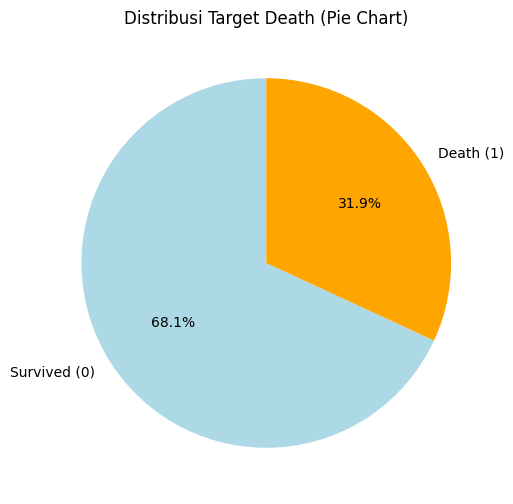

In [ ]:
plt.figure(figsize=(8, 6))
df['death'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'orange'], labels=['Survived (0)', 'Death (1)'], startangle=90)
plt.title('Distribusi Target Death (Pie Chart)')
plt.ylabel('')  


`distribusi kelas pada kolom target yang menunjukan kelas Survived (0) sebagai mayoritas dan kelas death(1) sebagai minoritas`

In [38]:
df.head()
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str)) 

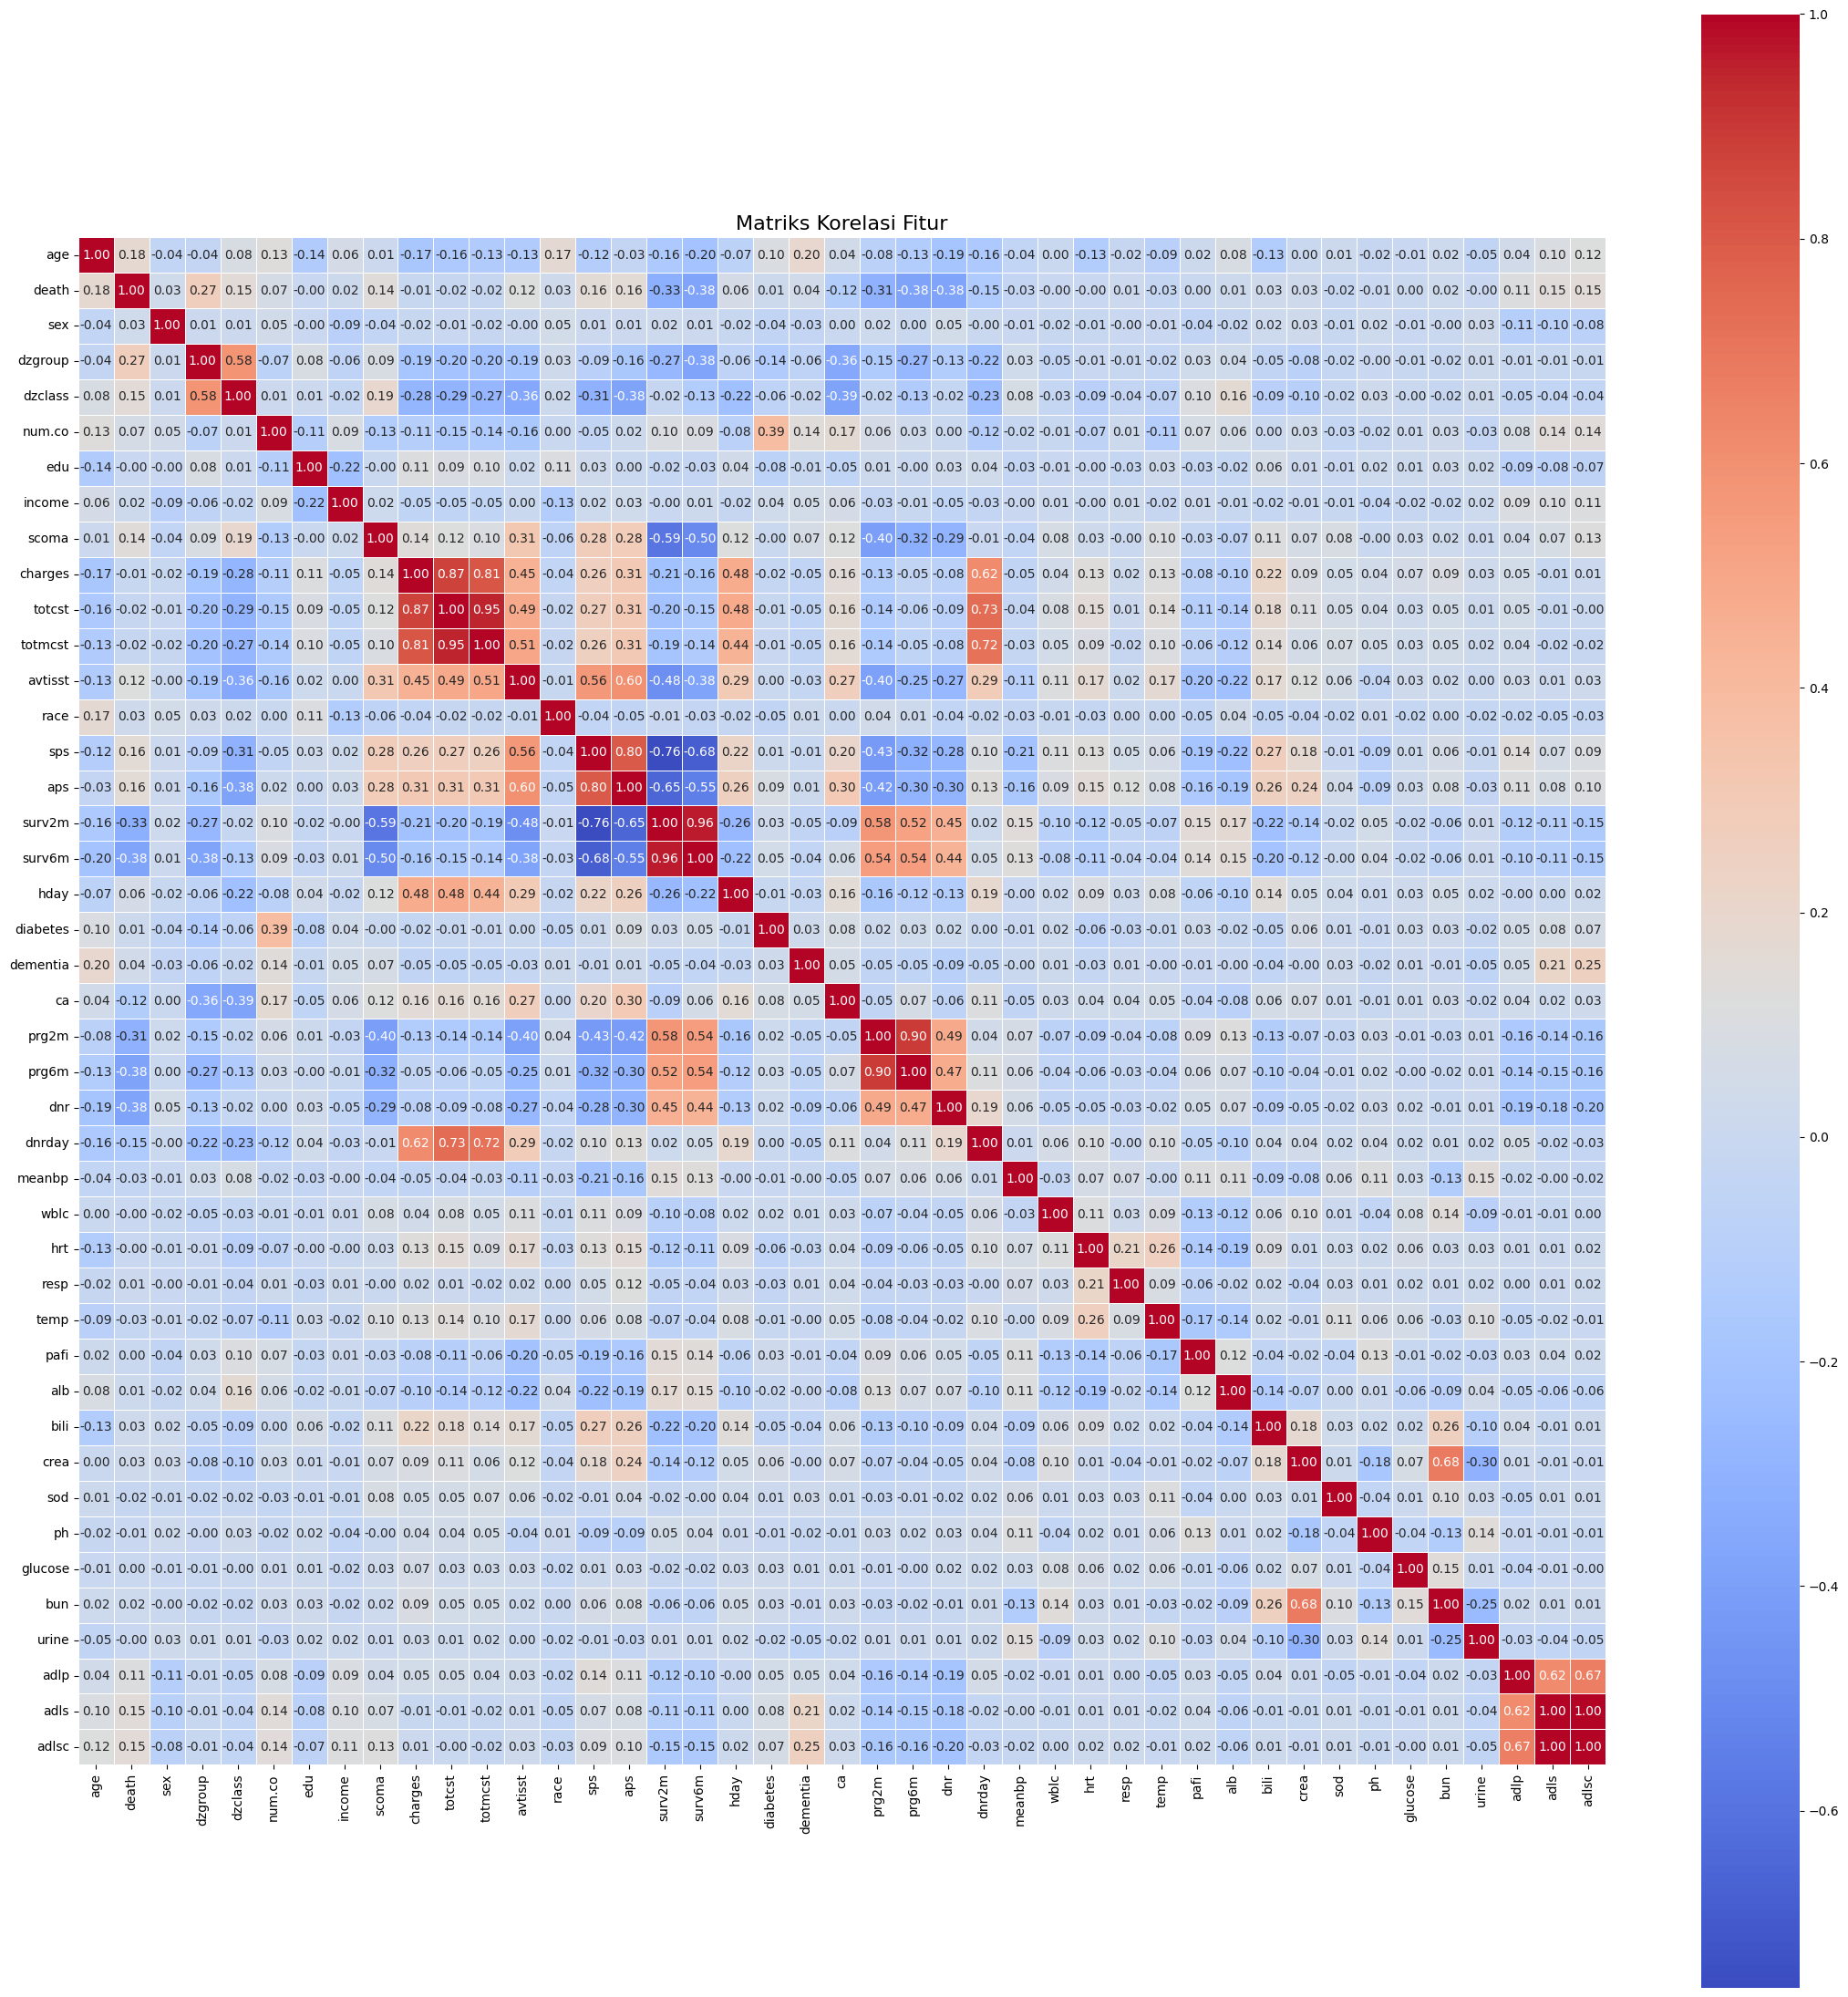

In [ ]:
correlation_matrix = df.corr()


plt.figure(figsize=(22, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True, linewidths=0.5)
plt.title('Matriks Korelasi Fitur', fontsize=16)
plt.tight_layout()
plt.show()

In [40]:
correlation_matrix = df.corr(numeric_only=True)
target_correlation = correlation_matrix["death"].sort_values(ascending=False)
target_correlation

death       1.000000
dzgroup     0.265955
age         0.179230
aps         0.156866
sps         0.156346
adlsc       0.154760
dzclass     0.154561
adls        0.146124
scoma       0.135986
avtisst     0.117293
adlp        0.107614
num.co      0.068634
hday        0.063845
dementia    0.044391
sex         0.032113
race        0.029675
bili        0.029658
crea        0.026705
bun         0.019307
income      0.017998
alb         0.014215
diabetes    0.011940
resp        0.006331
glucose     0.002928
pafi        0.002258
edu        -0.002943
hrt        -0.003841
urine      -0.004537
wblc       -0.004825
ph         -0.008592
charges    -0.014402
sod        -0.018409
totmcst    -0.020465
totcst     -0.022615
temp       -0.029459
meanbp     -0.031753
ca         -0.119434
dnrday     -0.146655
prg2m      -0.306923
surv2m     -0.325049
dnr        -0.377857
surv6m     -0.378247
prg6m      -0.383796
Name: death, dtype: float64

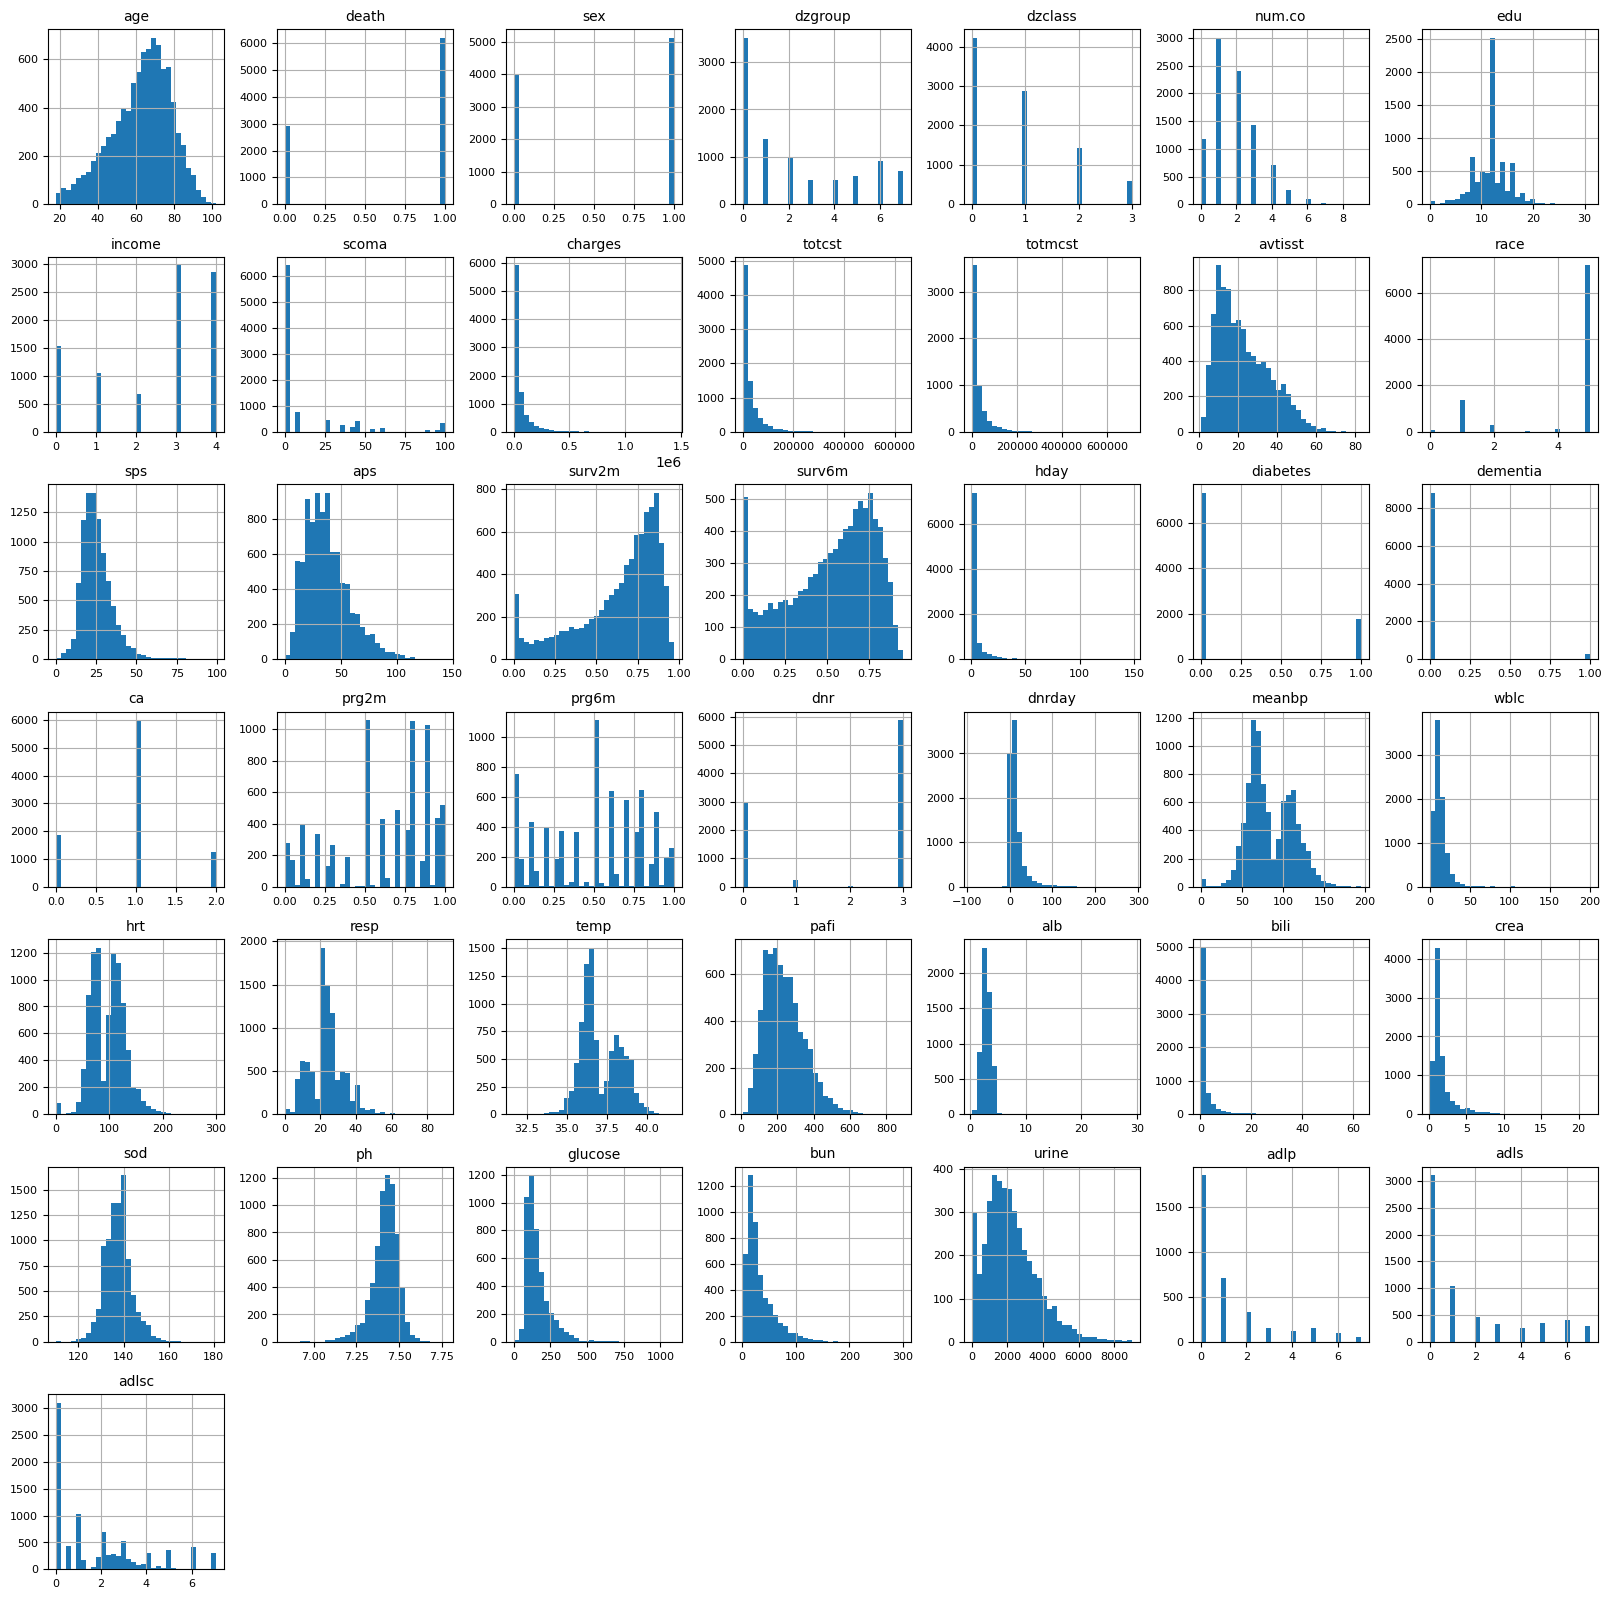

In [ ]:
fig = df.hist(figsize=(20, 20), bins=32)


for ax in fig.flatten():
    if ax is not None:  
        ax.set_title(ax.get_title(), fontsize=10)  
        ax.tick_params(axis='both', labelsize=8)  

plt.show()

In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage

edu        17.946183
scoma       0.010983
charges     1.889072
totcst      9.752883
totmcst    38.165843
avtisst     0.900604
sps         0.010983
aps         0.010983
surv2m      0.010983
surv6m      0.010983
prg2m      18.110928
prg6m      17.935200
dnrday      0.329489
meanbp      0.010983
wblc        2.328391
hrt         0.010983
resp        0.010983
temp        0.010983
pafi       25.535420
alb        37.034596
bili       28.566722
crea        0.735859
sod         0.010983
ph         25.085118
glucose    49.423394
bun        47.797913
urine      53.399231
adlp       61.954970
adls       31.488193
dtype: float64

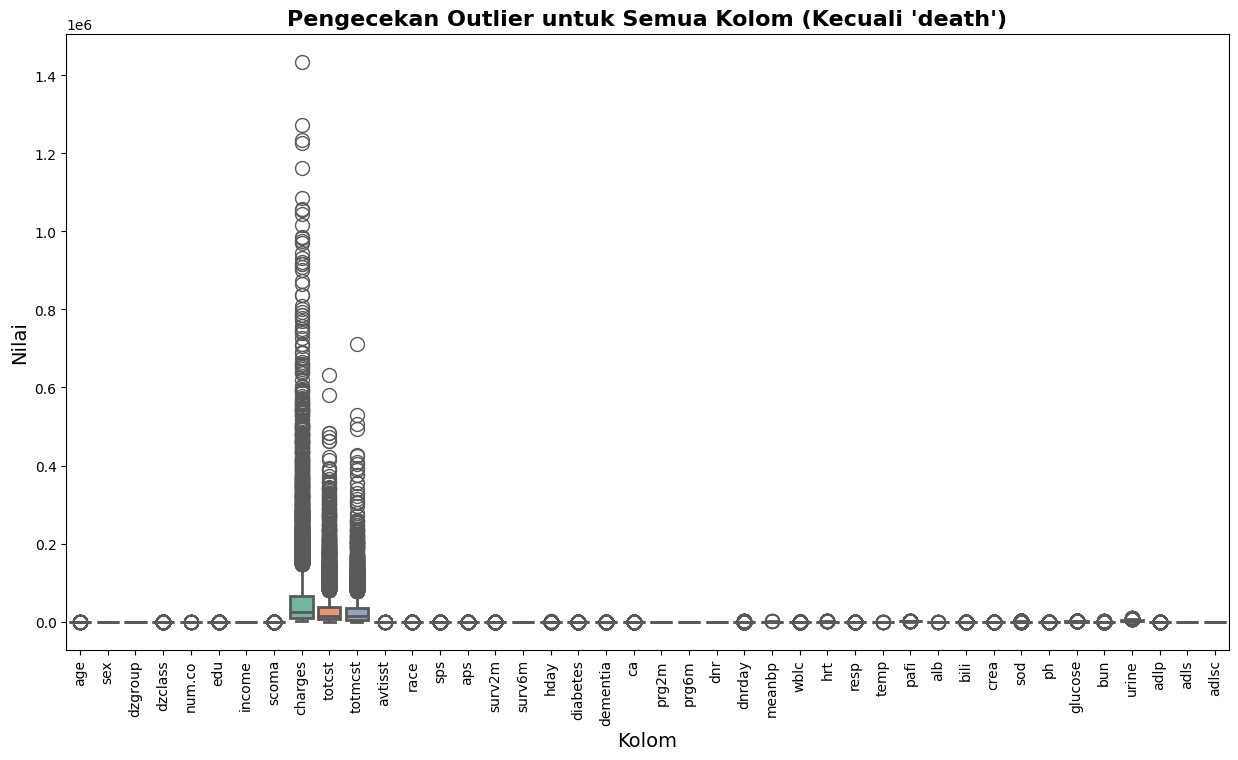

In [ ]:


df_without_death = df.drop(columns=['death'])


plt.figure(figsize=(15, 8))

sns.boxplot(data=df_without_death, palette="Set2", fliersize=10, linewidth=2)
plt.title("Pengecekan Outlier untuk Semua Kolom (Kecuali 'death')", fontsize=16, fontweight='bold')
plt.xlabel("Kolom", fontsize=14)
plt.ylabel("Nilai", fontsize=14)


plt.xticks(rotation=90)  
plt.show()


C:\Users\Theopan gerard\AppData\Local\Temp\ipykernel_1716\664930063.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


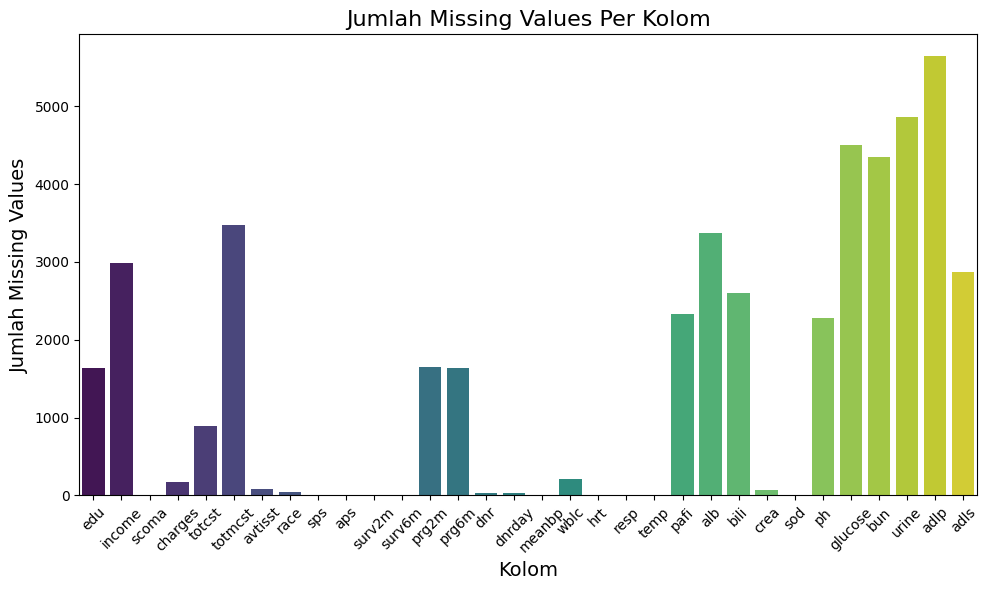

In [ ]:
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')

plt.title('Jumlah Missing Values Per Kolom', fontsize=16)
plt.xlabel('Kolom', fontsize=14)
plt.ylabel('Jumlah Missing Values', fontsize=14)
plt.xticks(rotation=45)  #


plt.tight_layout()
plt.show()

`measing value terbanyak ada pada kolom urine dan adlp tetapi kami tetap mengunakan kolom tersebut`

## Pre Prosesing

In [207]:
df=pd.read_csv('data.csv')

In [208]:
df.duplicated().sum()
df=df.drop(columns=['id','hospdead','sfdm2','slos','d.time'])

In [209]:
categorical_cols = df.select_dtypes(include=['object', 'category'])
print(categorical_cols)

         sex            dzgroup             dzclass      income   race  \
0       male        Lung Cancer              Cancer    $11-$25k  other   
1     female          Cirrhosis  COPD/CHF/Cirrhosis    $11-$25k  white   
2     female          Cirrhosis  COPD/CHF/Cirrhosis  under $11k  white   
3     female        Lung Cancer              Cancer  under $11k  white   
4     female  ARF/MOSF w/Sepsis            ARF/MOSF         NaN  white   
...      ...                ...                 ...         ...    ...   
9100    male  ARF/MOSF w/Sepsis            ARF/MOSF         NaN  white   
9101  female               Coma                Coma         NaN  white   
9102    male  ARF/MOSF w/Sepsis            ARF/MOSF         NaN  white   
9103    male       MOSF w/Malig            ARF/MOSF         NaN  white   
9104  female  ARF/MOSF w/Sepsis            ARF/MOSF    $11-$25k  white   

              ca             dnr  
0     metastatic          no dnr  
1             no             NaN  
2     

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   death     9105 non-null   int64  
 2   sex       9105 non-null   object 
 3   dzgroup   9105 non-null   object 
 4   dzclass   9105 non-null   object 
 5   num.co    9105 non-null   int64  
 6   edu       7471 non-null   float64
 7   income    6123 non-null   object 
 8   scoma     9104 non-null   float64
 9   charges   8933 non-null   float64
 10  totcst    8217 non-null   float64
 11  totmcst   5630 non-null   float64
 12  avtisst   9023 non-null   float64
 13  race      9063 non-null   object 
 14  sps       9104 non-null   float64
 15  aps       9104 non-null   float64
 16  surv2m    9104 non-null   float64
 17  surv6m    9104 non-null   float64
 18  hday      9105 non-null   int64  
 19  diabetes  9105 non-null   int64  
 20  dementia  9105 non-null   int6

### Numeric

In [211]:
cat=df.select_dtypes(include=['float64'])
cat.isna().sum()

age           0
edu        1634
scoma         1
charges     172
totcst      888
totmcst    3475
avtisst      82
sps           1
aps           1
surv2m        1
surv6m        1
prg2m      1649
prg6m      1633
dnrday       30
meanbp        1
wblc        212
hrt           1
resp          1
temp          1
pafi       2325
alb        3372
bili       2601
crea         67
sod           1
ph         2284
glucose    4500
bun        4352
urine      4862
adlp       5641
adls       2867
adlsc         0
dtype: int64

#### edu

0


<Axes: >

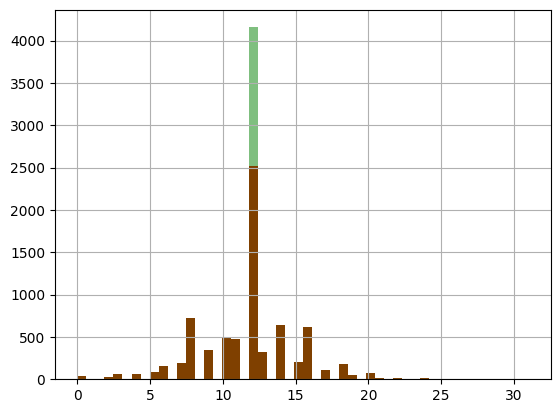

In [5]:
# Assuming you wanted to create a copy for median imputation
new_df_median = df.copy()

# Then proceed with filling missing values in 'edu' column
new_df_median.loc[:, 'edu'] = new_df_median['edu'].fillna(df['edu'].median())
print(new_df_median['edu'].isna().sum())

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['edu'].hist(bins=50, ax=ax, color='red')

new_df_median['edu'].hist(bins=50, ax=ax, color='green', alpha=0.5)

0


<Axes: >

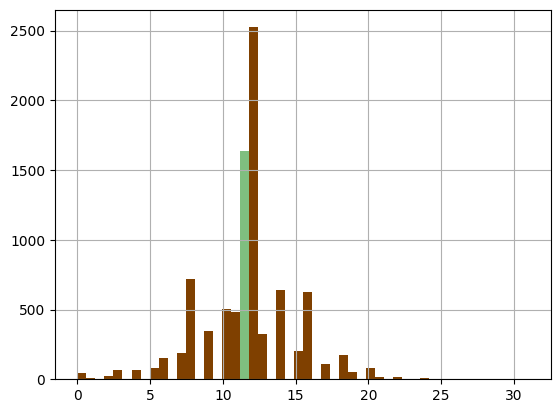

In [6]:
# Assuming you wanted to create a copy for median imputation
new_df_mean = df.copy()

# Then proceed with filling missing values in 'edu' column
new_df_mean.loc[:, 'edu'] = new_df_mean['edu'].fillna(df['edu'].mean())
print(new_df_mean['edu'].isna().sum())

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['edu'].hist(bins=50, ax=ax, color='red')

new_df_mean['edu'].hist(bins=50, ax=ax, color='green', alpha=0.5)

C:\Users\Theopan gerard\AppData\Local\Temp\ipykernel_10604\1540976400.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df_mode['edu'].fillna(df['edu'].mode().iloc[0], inplace=True)


0


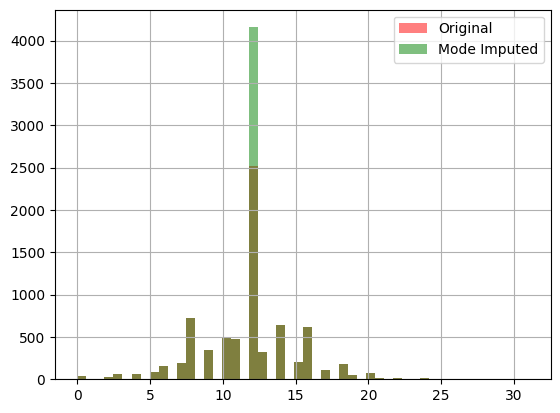

In [ ]:
new_df_mode = df.copy()

# Fill missing values in 'edu' column with mode (most frequent value)
new_df_mode['edu'].fillna(df['edu'].mode().iloc[0], inplace=True)

# Check if there are still missing values
print(new_df_mode['edu'].isna().sum())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['edu'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mode imputation
new_df_mode['edu'].hist(bins=50, ax=ax, color='green', alpha=0.5, label='Mode Imputed')

ax.legend()
plt.show()

#### prg2m

0


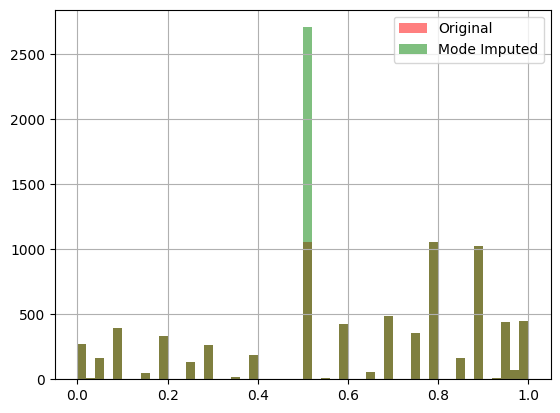

In [ ]:
new_df_mean = df.copy()

# Fill missing values in 'edu' column with mode (most frequent value)
new_df_mean.loc[:, 'prg2m'] = new_df_mean['prg2m'].fillna(df['prg2m'].mean())

# Check if there are still missing values
print(new_df_mean['prg2m'].isna().sum())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['prg2m'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mode imputation
new_df_mode['prg2m'].hist(bins=50, ax=ax, color='green', alpha=0.5, label='Mean Imputed')

ax.legend()
plt.show()

0


<Axes: >

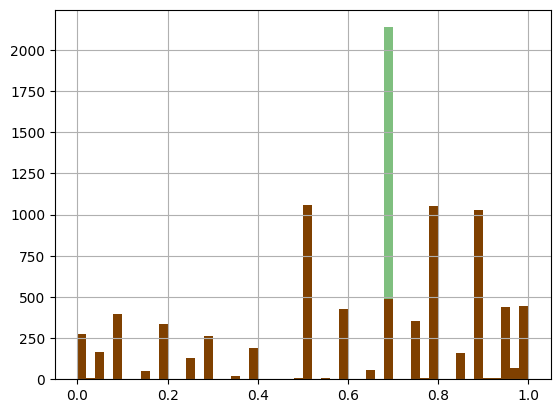

In [10]:
new_df_median = df.copy()

# Then proceed with filling missing values in 'edu' column
new_df_median.loc[:, 'prg2m'] = new_df_median['prg2m'].fillna(df['prg2m'].median())
print(new_df_median['prg2m'].isna().sum())

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['prg2m'].hist(bins=50, ax=ax, color='red')

new_df_median['prg2m'].hist(bins=50, ax=ax, color='green', alpha=0.5)

C:\Users\Theopan gerard\AppData\Local\Temp\ipykernel_10604\1785891015.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df_mode['prg2m'].fillna(df['prg2m'].mode().iloc[0], inplace=True)


0


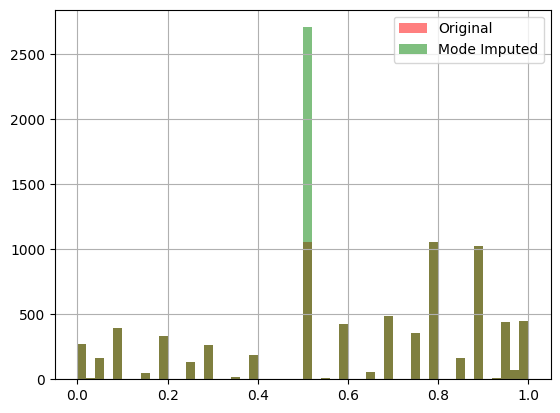

In [8]:
new_df_mode = df.copy()

# Fill missing values in 'edu' column with mode (most frequent value)
new_df_mode['prg2m'].fillna(df['prg2m'].mode().iloc[0], inplace=True)

# Check if there are still missing values
print(new_df_mode['prg2m'].isna().sum())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['prg2m'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mode imputation
new_df_mode['prg2m'].hist(bins=50, ax=ax, color='green', alpha=0.5, label='Mode Imputed')

ax.legend()
plt.show()

#### charges

0


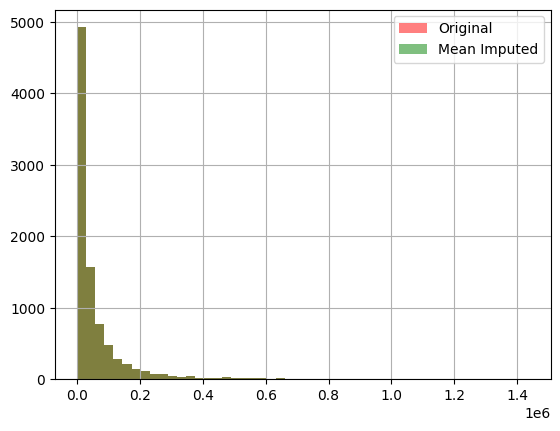

In [12]:
new_df_mean = df.copy()

# Fill missing values in 'edu' column with mode (most frequent value)
new_df_mean.loc[:, 'charges'] = new_df_mean['charges'].fillna(df['charges'].mean())

# Check if there are still missing values
print(new_df_mean['charges'].isna().sum())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['charges'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mode imputation
new_df_mode['charges'].hist(bins=50, ax=ax, color='green', alpha=0.5, label='Mean Imputed')

ax.legend()
plt.show()

0


<Axes: >

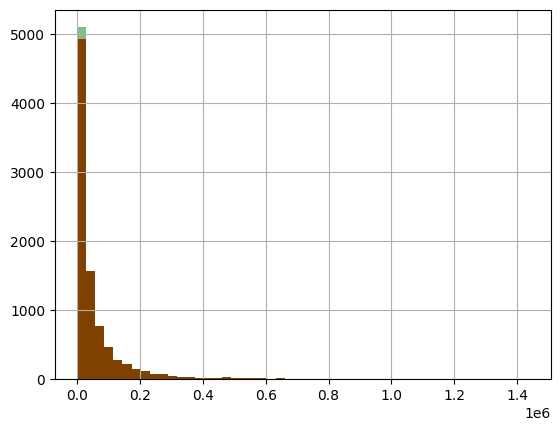

In [14]:
new_df_median = df.copy()

# Then proceed with filling missing values in 'edu' column
new_df_median.loc[:, 'charges'] = new_df_median['charges'].fillna(df['charges'].median())
print(new_df_median['charges'].isna().sum())

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['charges'].hist(bins=50, ax=ax, color='red')

new_df_median['charges'].hist(bins=50, ax=ax, color='green', alpha=0.5)

C:\Users\Theopan gerard\AppData\Local\Temp\ipykernel_10604\1836120155.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df_mode['charges'].fillna(df['charges'].mode().iloc[0], inplace=True)


0


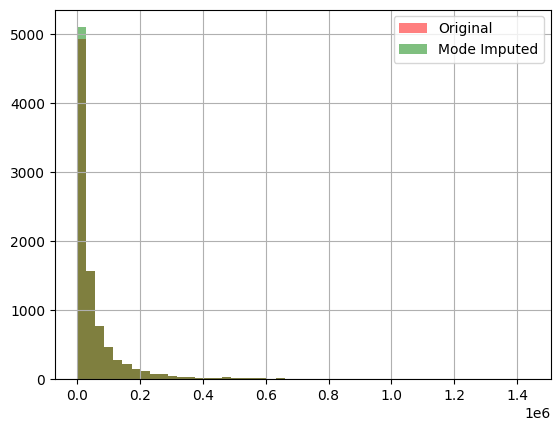

In [16]:
new_df_mode = df.copy()

# Fill missing values in 'edu' column with mode (most frequent value)
new_df_mode['charges'].fillna(df['charges'].mode().iloc[0], inplace=True)

# Check if there are still missing values
print(new_df_mode['charges'].isna().sum())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['charges'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mode imputation
new_df_mode['charges'].hist(bins=50, ax=ax, color='green', alpha=0.5, label='Mode Imputed')

ax.legend()
plt.show()

#### totcst

0


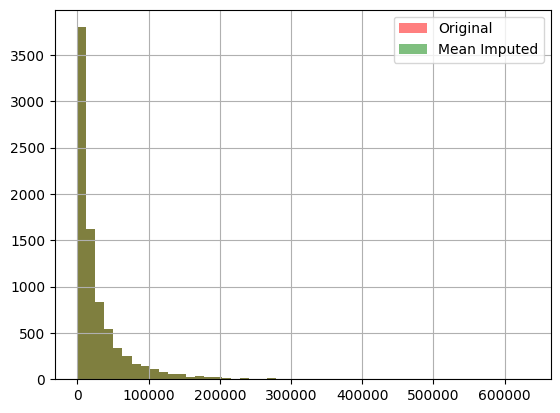

In [17]:
new_df_mean = df.copy()

# Fill missing values in 'edu' column with mode (most frequent value)
new_df_mean.loc[:, 'totcst'] = new_df_mean['totcst'].fillna(df['totcst'].mean())

# Check if there are still missing values
print(new_df_mean['totcst'].isna().sum())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['totcst'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mode imputation
new_df_mode['totcst'].hist(bins=50, ax=ax, color='green', alpha=0.5, label='Mean Imputed')

ax.legend()
plt.show()

0


<Axes: >

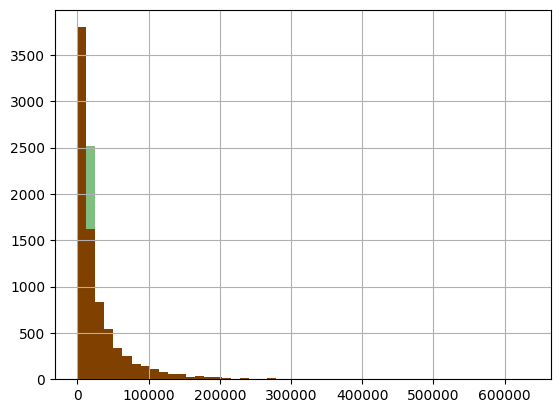

In [18]:
new_df_median = df.copy()

# Then proceed with filling missing values in 'edu' column
new_df_median.loc[:, 'totcst'] = new_df_median['totcst'].fillna(df['totcst'].median())
print(new_df_median['totcst'].isna().sum())

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['totcst'].hist(bins=50, ax=ax, color='red')

new_df_median['totcst'].hist(bins=50, ax=ax, color='green', alpha=0.5)

C:\Users\Theopan gerard\AppData\Local\Temp\ipykernel_10604\546405442.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df_mode['totcst'].fillna(df['totcst'].mode().iloc[0], inplace=True)


0


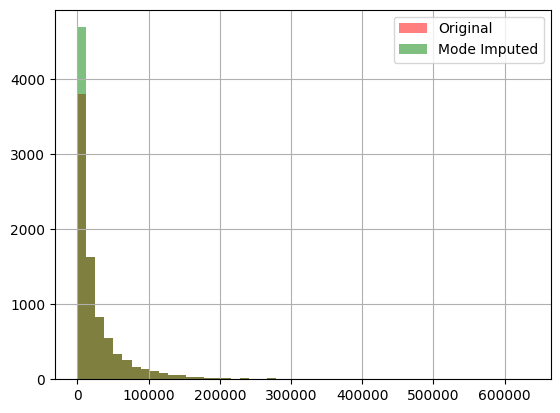

In [19]:
new_df_mode = df.copy()

# Fill missing values in 'edu' column with mode (most frequent value)
new_df_mode['totcst'].fillna(df['totcst'].mode().iloc[0], inplace=True)

# Check if there are still missing values
print(new_df_mode['totcst'].isna().sum())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['totcst'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mode imputation
new_df_mode['totcst'].hist(bins=50, ax=ax, color='green', alpha=0.5, label='Mode Imputed')

ax.legend()
plt.show()

#### totmcst

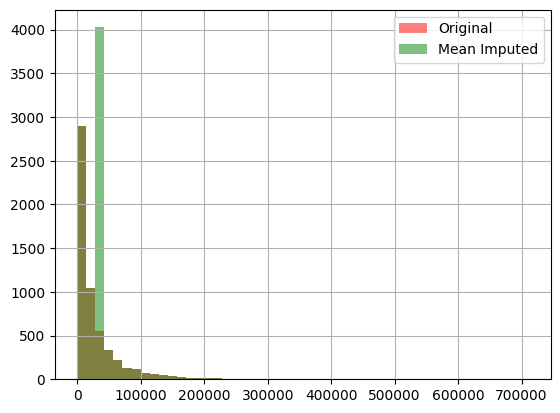

In [20]:
new_df_mean = df.copy()

# Fill missing values in 'totcst' column with mean
new_df_mean['totmcst'] = new_df_mean['totmcst'].fillna(df['totmcst'].mean())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['totmcst'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mean imputation
new_df_mean['totmcst'].hist(bins=50, ax=ax, color='green', alpha=0.5, label='Mean Imputed')

ax.legend()
plt.show()


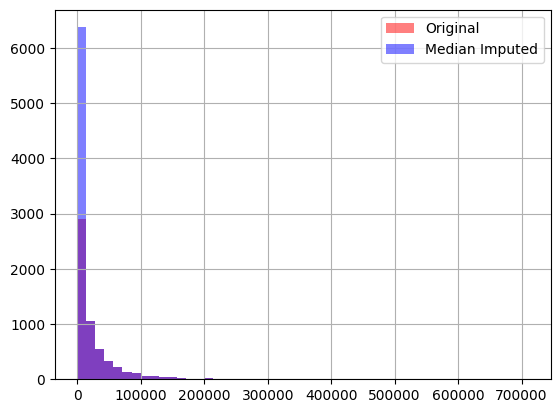

In [21]:
new_df_median = df.copy()

# Fill missing values in 'totcst' column with median
new_df_median['totmcst'] = new_df_median['totmcst'].fillna(df['totmcst'].median())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['totmcst'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after median imputation
new_df_median['totmcst'].hist(bins=50, ax=ax, color='blue', alpha=0.5, label='Median Imputed')

ax.legend()
plt.show()

C:\Users\Theopan gerard\AppData\Local\Temp\ipykernel_10604\665122761.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df_mode['totcst'].fillna(df['totcst'].mode().iloc[0], inplace=True)


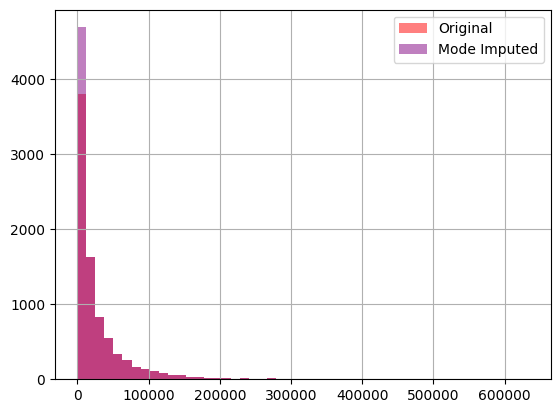

In [22]:
new_df_mode = df.copy()

# Fill missing values in 'totcst' column with mode (most frequent value)
new_df_mode['totcst'].fillna(df['totcst'].mode().iloc[0], inplace=True)

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['totcst'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mode imputation
new_df_mode['totcst'].hist(bins=50, ax=ax, color='purple', alpha=0.5, label='Mode Imputed')

ax.legend()
plt.show()

#### avtisst     

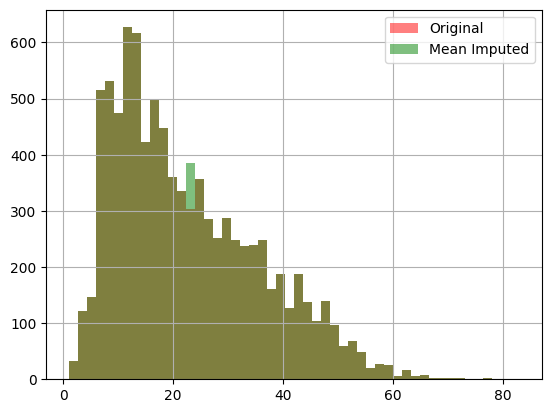

In [23]:
ew_df_mean = df.copy()

# Fill missing values in 'totcst' column with mean
new_df_mean['avtisst'] = new_df_mean['avtisst'].fillna(df['avtisst'].mean())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['avtisst'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mean imputation
new_df_mean['avtisst'].hist(bins=50, ax=ax, color='green', alpha=0.5, label='Mean Imputed')

ax.legend()
plt.show()


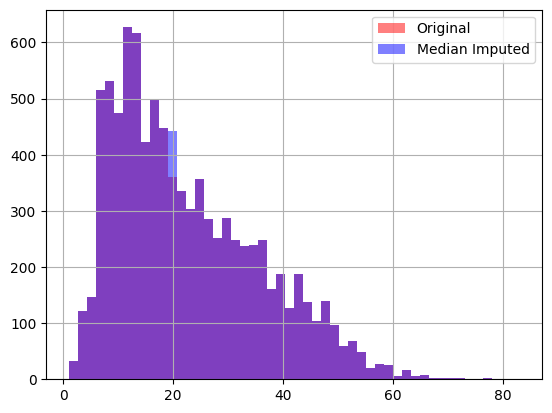

In [24]:
new_df_median = df.copy()

# Fill missing values in 'totcst' column with median
new_df_median['avtisst'] = new_df_median['avtisst'].fillna(df['avtisst'].median())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['avtisst'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after median imputation
new_df_median['avtisst'].hist(bins=50, ax=ax, color='blue', alpha=0.5, label='Median Imputed')

ax.legend()
plt.show()

C:\Users\Theopan gerard\AppData\Local\Temp\ipykernel_10604\1325268402.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df_mode['avtisst'].fillna(df['avtisst'].mode().iloc[0], inplace=True)


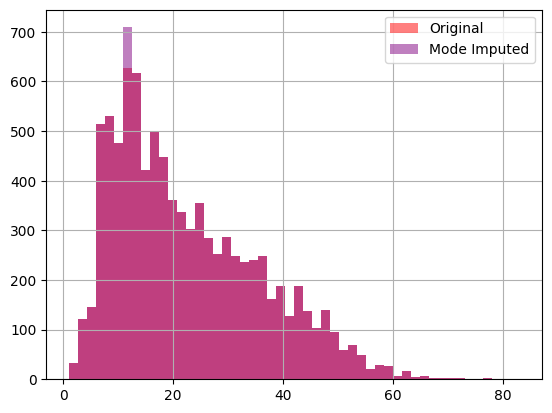

In [25]:
new_df_mode = df.copy()

# Fill missing values in 'avtisst' column with mode (most frequent value)
new_df_mode['avtisst'].fillna(df['avtisst'].mode().iloc[0], inplace=True)

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['avtisst'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mode imputation
new_df_mode['avtisst'].hist(bins=50, ax=ax, color='purple', alpha=0.5, label='Mode Imputed')

ax.legend()
plt.show()

#### scoma

C:\Users\Theopan gerard\AppData\Local\Temp\ipykernel_10604\1870383992.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df_mode['scoma'].fillna(df['scoma'].mode().iloc[0], inplace=True)


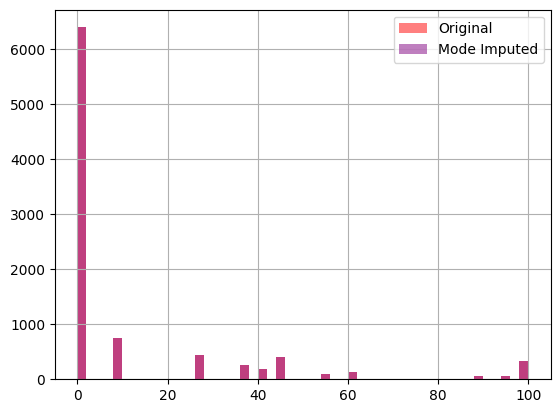

In [26]:
new_df_mode = df.copy()

# Fill missing values in 'scoma' column with mode (most frequent value)
new_df_mode['scoma'].fillna(df['scoma'].mode().iloc[0], inplace=True)

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['scoma'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mode imputation
new_df_mode['scoma'].hist(bins=50, ax=ax, color='purple', alpha=0.5, label='Mode Imputed')

ax.legend()
plt.show()

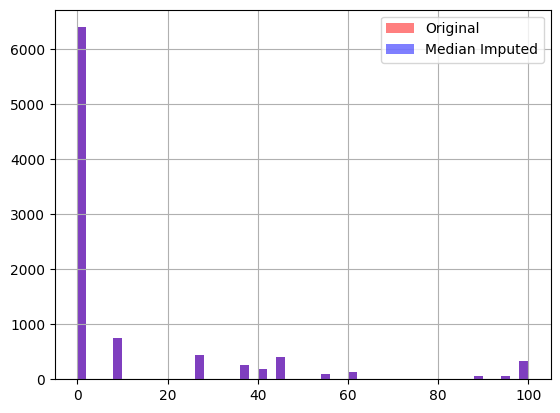

In [27]:
new_df_median = df.copy()

# Fill missing values in 'scoma' column with median
new_df_median['scoma'] = new_df_median['scoma'].fillna(df['scoma'].median())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['scoma'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after median imputation
new_df_median['scoma'].hist(bins=50, ax=ax, color='blue', alpha=0.5, label='Median Imputed')

ax.legend()
plt.show()

C:\Users\Theopan gerard\AppData\Local\Temp\ipykernel_10604\1870383992.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df_mode['scoma'].fillna(df['scoma'].mode().iloc[0], inplace=True)


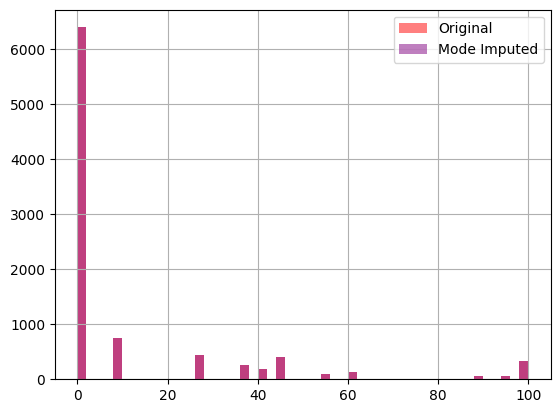

In [28]:
new_df_mode = df.copy()

# Fill missing values in 'scoma' column with mode (most frequent value)
new_df_mode['scoma'].fillna(df['scoma'].mode().iloc[0], inplace=True)

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['scoma'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mode imputation
new_df_mode['scoma'].hist(bins=50, ax=ax, color='purple', alpha=0.5, label='Mode Imputed')

ax.legend()
plt.show()

#### sps

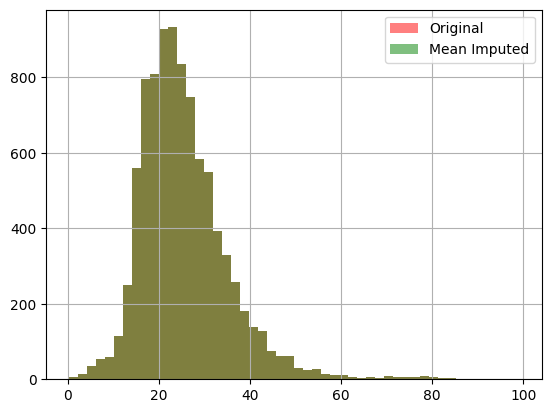

In [29]:
new_df_mean = df.copy()

# Fill missing values in '' column with mean
new_df_mean['sps'] = new_df_mean['sps'].fillna(df['sps'].mean())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['sps'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mean imputation
new_df_mean['sps'].hist(bins=50, ax=ax, color='green', alpha=0.5, label='Mean Imputed')

ax.legend()
plt.show()

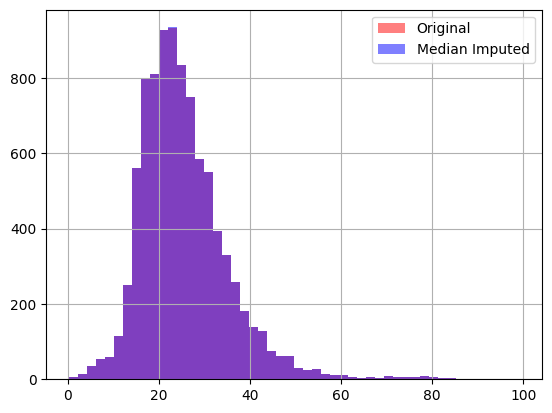

In [30]:
new_df_median = df.copy()

# Fill missing values in 'sps' column with median
new_df_median['sps'] = new_df_median['sps'].fillna(df['sps'].median())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['sps'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after median imputation
new_df_median['sps'].hist(bins=50, ax=ax, color='blue', alpha=0.5, label='Median Imputed')

ax.legend()
plt.show()

C:\Users\Theopan gerard\AppData\Local\Temp\ipykernel_10604\4286818473.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df_mode['sps'].fillna(df['sps'].mode().iloc[0], inplace=True)


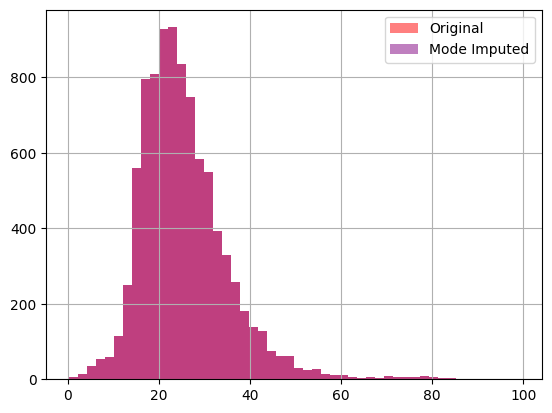

In [31]:
new_df_mode = df.copy()

# Fill missing values in 'totcst' column with mode (most frequent value)
new_df_mode['sps'].fillna(df['sps'].mode().iloc[0], inplace=True)

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['sps'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mode imputation
new_df_mode['sps'].hist(bins=50, ax=ax, color='purple', alpha=0.5, label='Mode Imputed')

ax.legend()
plt.show()

#### aps

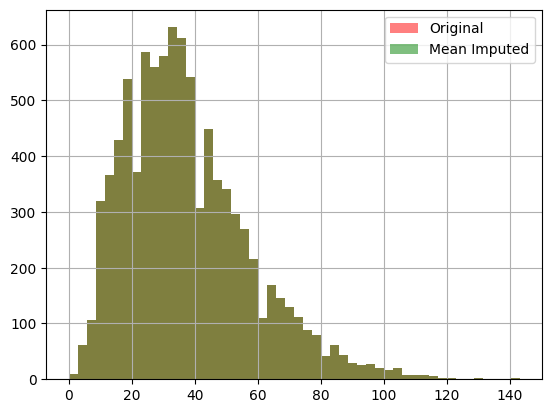

In [32]:
new_df_mean = df.copy()

# Fill missing values in 'aps' column with mean
new_df_mean['aps'] = new_df_mean['aps'].fillna(df['aps'].mean())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['aps'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mean imputation
new_df_mean['aps'].hist(bins=50, ax=ax, color='green', alpha=0.5, label='Mean Imputed')

ax.legend()
plt.show()

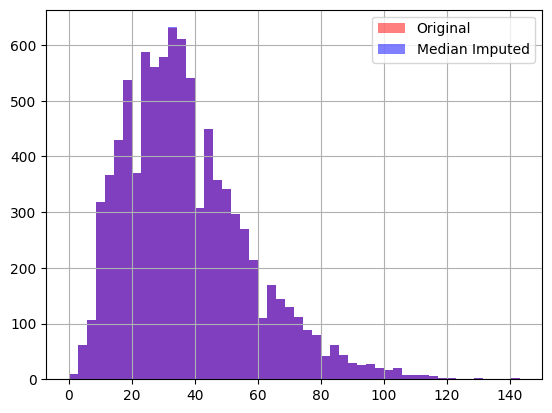

In [33]:
new_df_median = df.copy()

# Fill missing values in 'aps' column with median
new_df_median['aps'] = new_df_median['aps'].fillna(df['aps'].median())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['aps'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after median imputation
new_df_median['aps'].hist(bins=50, ax=ax, color='blue', alpha=0.5, label='Median Imputed')

ax.legend()
plt.show()

C:\Users\Theopan gerard\AppData\Local\Temp\ipykernel_10604\665122761.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df_mode['totcst'].fillna(df['totcst'].mode().iloc[0], inplace=True)


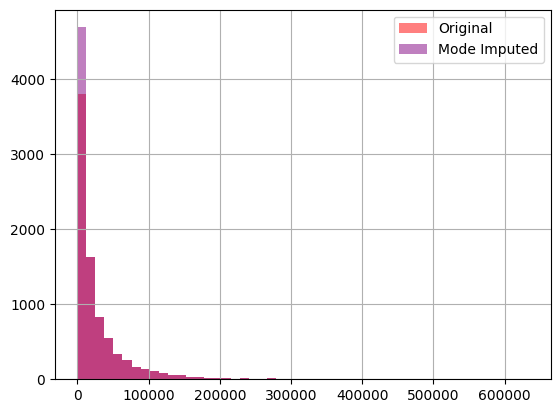

In [34]:
new_df_mode = df.copy()

# Fill missing values in 'totcst' column with mode (most frequent value)
new_df_mode['totcst'].fillna(df['totcst'].mode().iloc[0], inplace=True)

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['totcst'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mode imputation
new_df_mode['totcst'].hist(bins=50, ax=ax, color='purple', alpha=0.5, label='Mode Imputed')

ax.legend()
plt.show()

#### surv2m

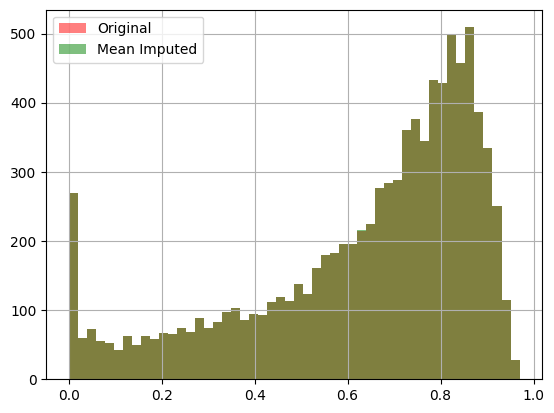

In [35]:
new_df_mean = df.copy()

# Fill missing values in 'surv2m' column with mean
new_df_mean['surv2m'] = new_df_mean['surv2m'].fillna(df['surv2m'].mean())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['surv2m'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mean imputation
new_df_mean['surv2m'].hist(bins=50, ax=ax, color='green', alpha=0.5, label='Mean Imputed')

ax.legend()
plt.show()

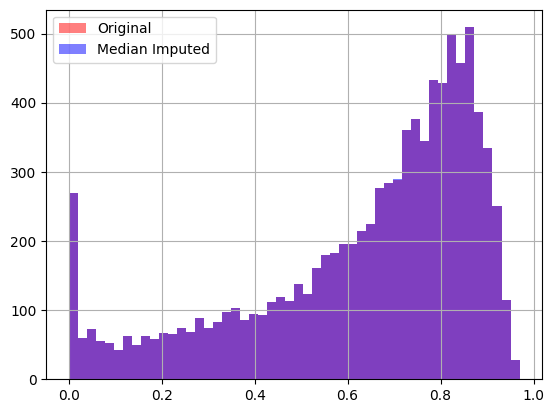

In [36]:
new_df_median = df.copy()

# Fill missing values in 'surv2m' column with median
new_df_median['surv2m'] = new_df_median['surv2m'].fillna(df['surv2m'].median())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['surv2m'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after median imputation
new_df_median['surv2m'].hist(bins=50, ax=ax, color='blue', alpha=0.5, label='Median Imputed')

ax.legend()
plt.show()

C:\Users\Theopan gerard\AppData\Local\Temp\ipykernel_10604\2824932713.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df_mode['surv2m'].fillna(df['surv2m'].mode().iloc[0], inplace=True)


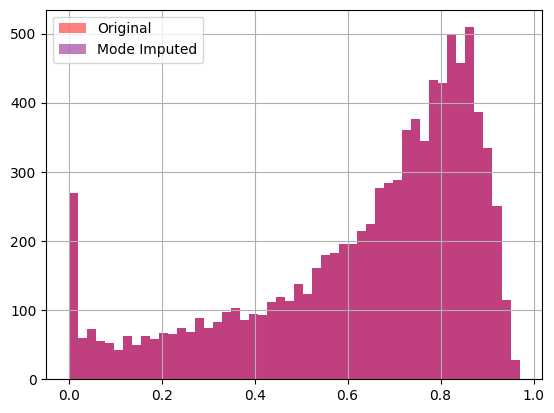

In [37]:
new_df_mode = df.copy()

# Fill missing values in 'surv2m' column with mode (most frequent value)
new_df_mode['surv2m'].fillna(df['surv2m'].mode().iloc[0], inplace=True)

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['surv2m'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mode imputation
new_df_mode['surv2m'].hist(bins=50, ax=ax, color='purple', alpha=0.5, label='Mode Imputed')

ax.legend()
plt.show()

#### surv6m

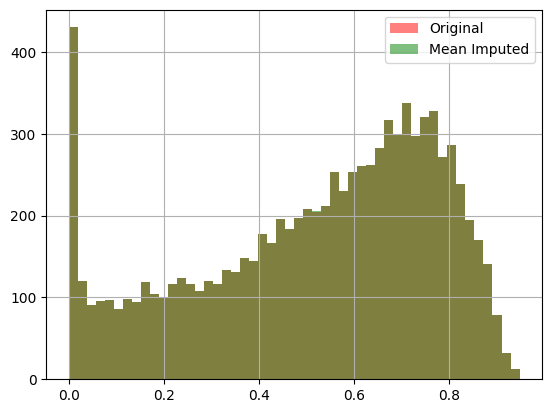

In [38]:
new_df_mean = df.copy()

# Fill missing values in 'surv6m' column with mean
new_df_mean['surv6m'] = new_df_mean['surv6m'].fillna(df['surv6m'].mean())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['surv6m'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mean imputation
new_df_mean['surv6m'].hist(bins=50, ax=ax, color='green', alpha=0.5, label='Mean Imputed')

ax.legend()
plt.show()

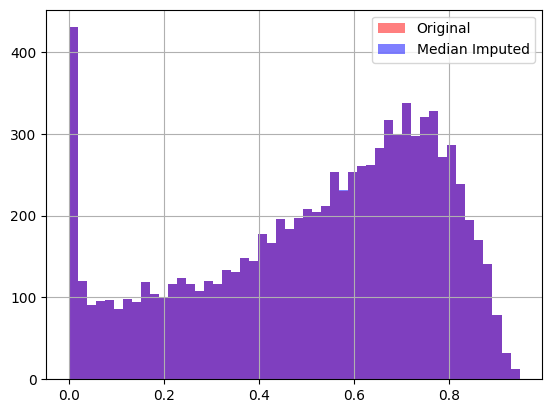

In [40]:
new_df_median = df.copy()

# Fill missing values in 'surv6m' column with median
new_df_median['surv6m'] = new_df_median['surv6m'].fillna(df['surv6m'].median())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['surv6m'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after median imputation
new_df_median['surv6m'].hist(bins=50, ax=ax, color='blue', alpha=0.5, label='Median Imputed')

ax.legend()
plt.show()


C:\Users\Theopan gerard\AppData\Local\Temp\ipykernel_10604\489022136.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df_mode['surv6m'].fillna(df['surv6m'].mode().iloc[0], inplace=True)


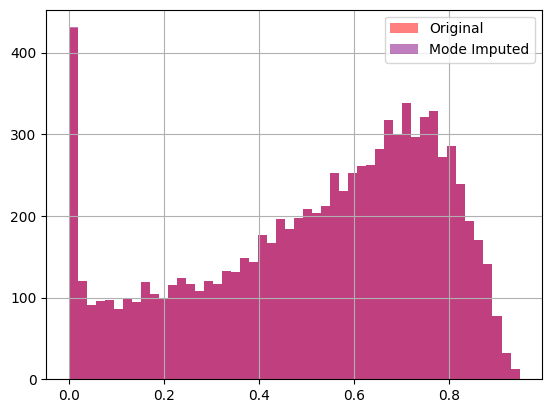

In [41]:
new_df_mode = df.copy()

# Fill missing values in 'surv6m' column with mode (most frequent value)
new_df_mode['surv6m'].fillna(df['surv6m'].mode().iloc[0], inplace=True)

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['surv6m'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mode imputation
new_df_mode['surv6m'].hist(bins=50, ax=ax, color='purple', alpha=0.5, label='Mode Imputed')

ax.legend()
plt.show()

#### hday

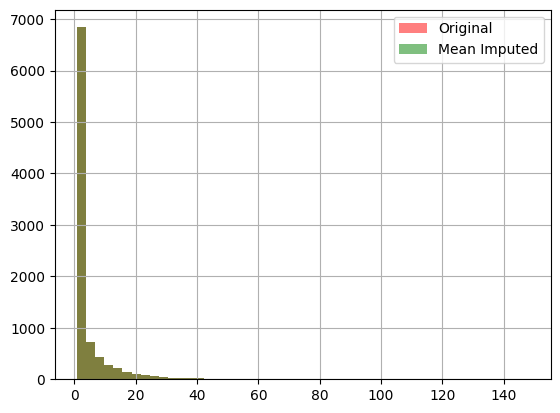

In [42]:
new_df_mean = df.copy()

# Fill missing values in 'hday' column with mean
new_df_mean['hday'] = new_df_mean['hday'].fillna(df['hday'].mean())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['hday'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mean imputation
new_df_mean['hday'].hist(bins=50, ax=ax, color='green', alpha=0.5, label='Mean Imputed')

ax.legend()
plt.show()

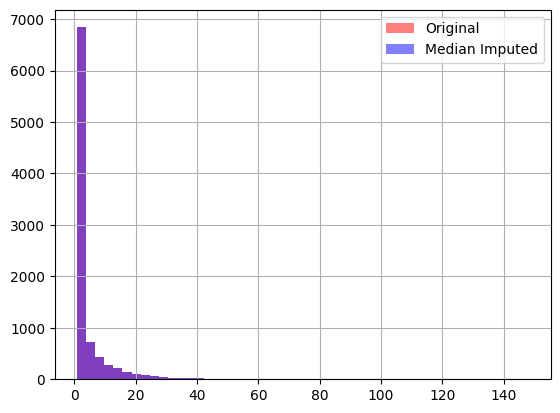

In [43]:
new_df_median['hday'] = new_df_median['hday'].fillna(df['hday'].median())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['hday'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after median imputation
new_df_median['hday'].hist(bins=50, ax=ax, color='blue', alpha=0.5, label='Median Imputed')

ax.legend()
plt.show()

C:\Users\Theopan gerard\AppData\Local\Temp\ipykernel_10604\1856291235.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df_mode['hday'].fillna(df['hday'].mode().iloc[0], inplace=True)


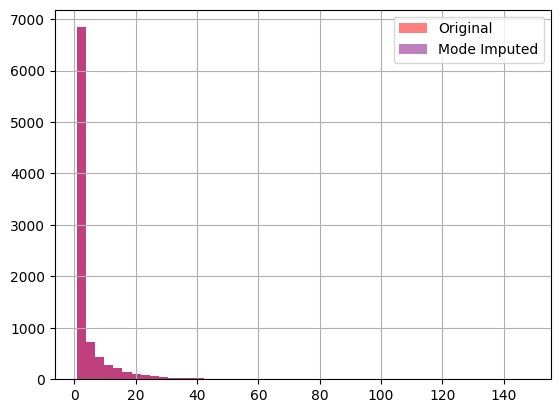

In [44]:
new_df_mode = df.copy()

# Fill missing values in 'hday' column with mode (most frequent value)
new_df_mode['hday'].fillna(df['hday'].mode().iloc[0], inplace=True)

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['hday'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mode imputation
new_df_mode['hday'].hist(bins=50, ax=ax, color='purple', alpha=0.5, label='Mode Imputed')

ax.legend()
plt.show()

#### hrt

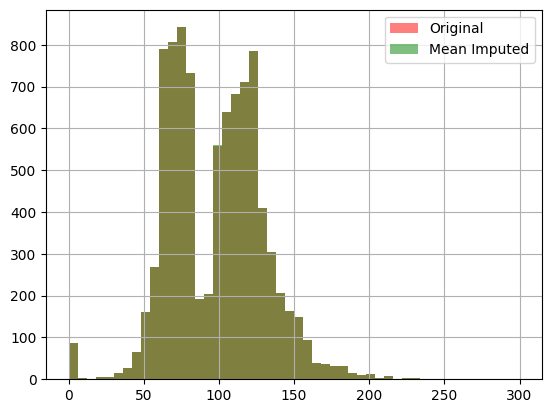

In [45]:
new_df_mean = df.copy()

# Fill missing values in 'totcst' column with mean
new_df_mean['hrt'] = new_df_mean['hrt'].fillna(df['hrt'].mean())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['hrt'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mean imputation
new_df_mean['hrt'].hist(bins=50, ax=ax, color='green', alpha=0.5, label='Mean Imputed')

ax.legend()
plt.show()

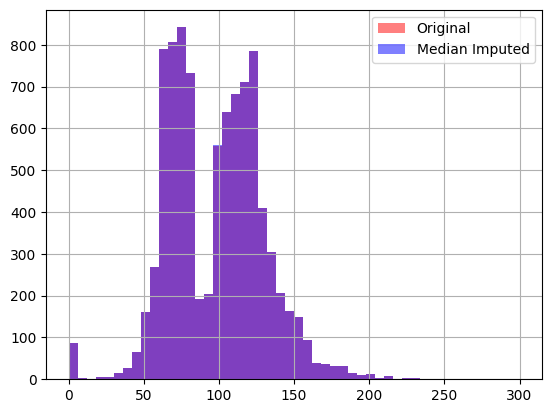

In [46]:
new_df_median = df.copy()

# Fill missing values in 'hrt' column with median
new_df_median['hrt'] = new_df_median['hrt'].fillna(df['hrt'].median())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['hrt'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after median imputation
new_df_median['hrt'].hist(bins=50, ax=ax, color='blue', alpha=0.5, label='Median Imputed')

ax.legend()
plt.show()

C:\Users\Theopan gerard\AppData\Local\Temp\ipykernel_10604\3793178285.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df_mode['hrt'].fillna(df['hrt'].mode().iloc[0], inplace=True)


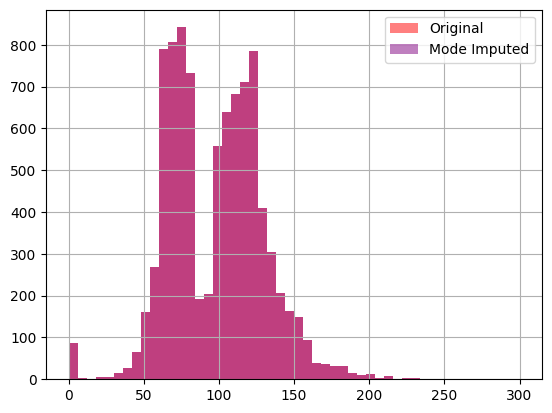

In [47]:
new_df_mode = df.copy()

# Fill missing values in 'hrt' column with mode (most frequent value)
new_df_mode['hrt'].fillna(df['hrt'].mode().iloc[0], inplace=True)

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['hrt'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mode imputation
new_df_mode['hrt'].hist(bins=50, ax=ax, color='purple', alpha=0.5, label='Mode Imputed')

ax.legend()
plt.show()

#### glucose

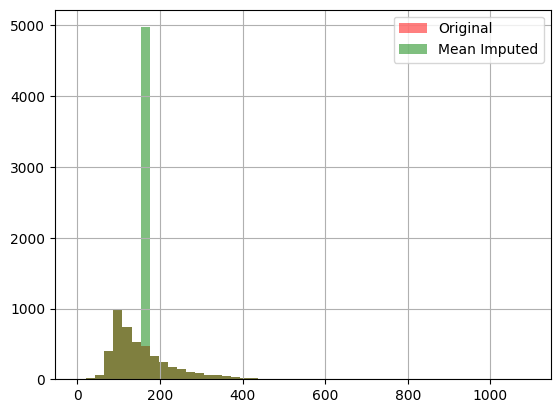

In [48]:
new_df_mean = df.copy()

# Fill missing values in 'glucose' column with mean
new_df_mean['glucose'] = new_df_mean['glucose'].fillna(df['glucose'].mean())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['glucose'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mean imputation
new_df_mean['glucose'].hist(bins=50, ax=ax, color='green', alpha=0.5, label='Mean Imputed')

ax.legend()
plt.show()

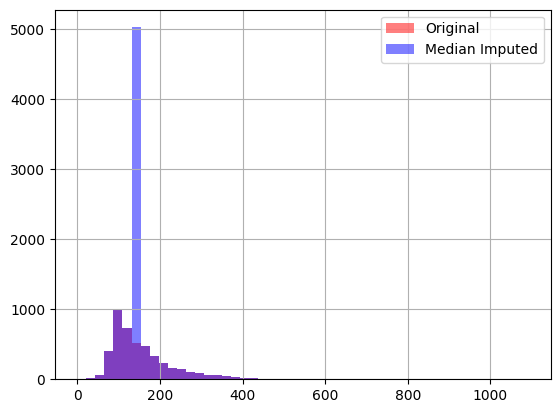

In [49]:
new_df_median = df.copy()

# Fill missing values in 'glucose' column with median
new_df_median['glucose'] = new_df_median['glucose'].fillna(df['glucose'].median())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['glucose'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after median imputation
new_df_median['glucose'].hist(bins=50, ax=ax, color='blue', alpha=0.5, label='Median Imputed')

ax.legend()
plt.show()

C:\Users\Theopan gerard\AppData\Local\Temp\ipykernel_10604\3868854212.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df_mode['glucose'].fillna(df['glucose'].mode().iloc[0], inplace=True)


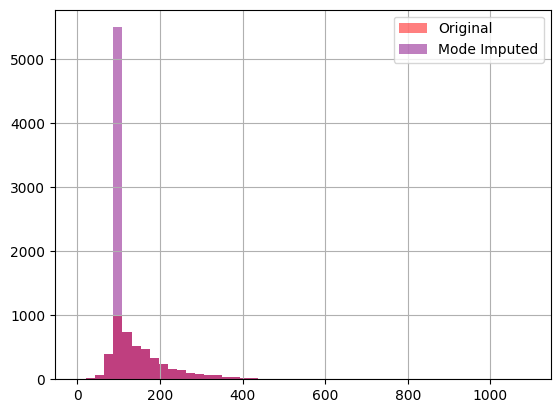

In [50]:
new_df_mode = df.copy()

# Fill missing values in 'glucose' column with mode (most frequent value)
new_df_mode['glucose'].fillna(df['glucose'].mode().iloc[0], inplace=True)

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['glucose'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mode imputation
new_df_mode['glucose'].hist(bins=50, ax=ax, color='purple', alpha=0.5, label='Mode Imputed')

ax.legend()
plt.show()

#### prg6m

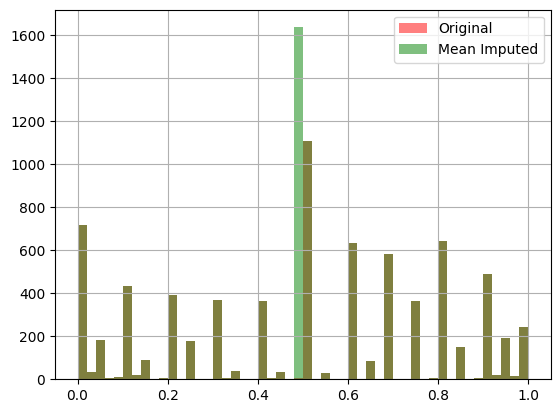

In [51]:
new_df_mean = df.copy()

# Fill missing values in 'prg6m' column with mean
new_df_mean['prg6m'] = new_df_mean['prg6m'].fillna(df['prg6m'].mean())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['prg6m'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mean imputation
new_df_mean['prg6m'].hist(bins=50, ax=ax, color='green', alpha=0.5, label='Mean Imputed')

ax.legend()
plt.show()

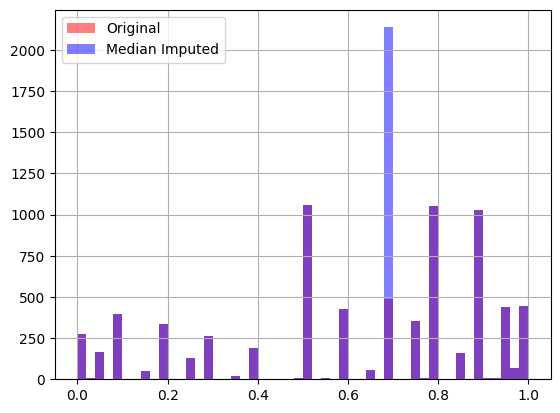

In [53]:
new_df_median = df.copy()

# Fill missing values in 'prg2m' column with median
new_df_median['prg2m'] = new_df_median['prg2m'].fillna(df['prg2m'].median())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['prg2m'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after median imputation
new_df_median['prg2m'].hist(bins=50, ax=ax, color='blue', alpha=0.5, label='Median Imputed')

ax.legend()
plt.show()


C:\Users\Theopan gerard\AppData\Local\Temp\ipykernel_10604\1135114808.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df_mode['prg2m'].fillna(df['prg2m'].mode().iloc[0], inplace=True)


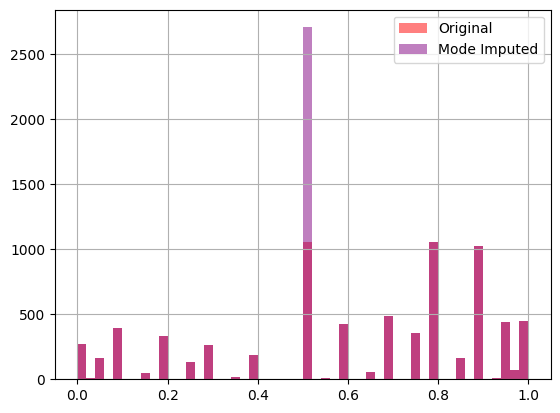

In [54]:
new_df_mode = df.copy()

# Fill missing values in 'prg2m' column with mode (most frequent value)
new_df_mode['prg2m'].fillna(df['prg2m'].mode().iloc[0], inplace=True)

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['prg2m'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mode imputation
new_df_mode['prg2m'].hist(bins=50, ax=ax, color='purple', alpha=0.5, label='Mode Imputed')

ax.legend()
plt.show()

#### diabetes    

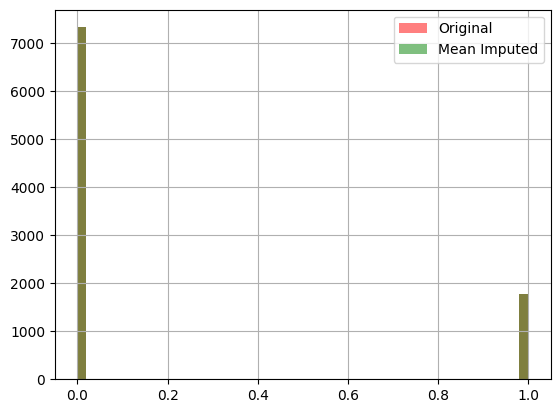

In [55]:
new_df_mean = df.copy()

# Fill missing values in 'diabetes' column with mean
new_df_mean['diabetes'] = new_df_mean['diabetes'].fillna(df['diabetes'].mean())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['diabetes'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after mean imputation
new_df_mean['diabetes'].hist(bins=50, ax=ax, color='green', alpha=0.5, label='Mean Imputed')

ax.legend()
plt.show()

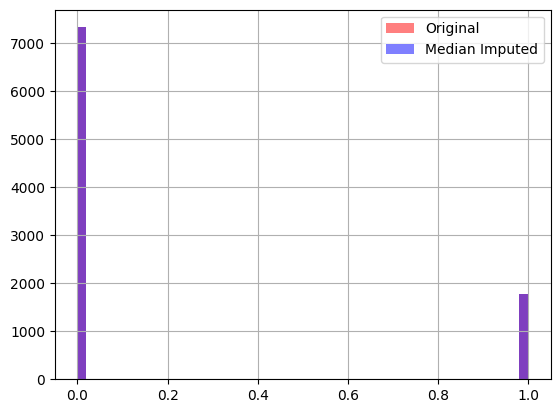

In [56]:
new_df_median = df.copy()

# Fill missing values in 'diabetes' column with median
new_df_median['diabetes'] = new_df_median['diabetes'].fillna(df['diabetes'].median())

# Plot histogram
fig = plt.figure()
ax = fig.add_subplot(111)

# Original data
df['diabetes'].hist(bins=50, ax=ax, color='red', alpha=0.5, label='Original')

# Data after median imputation
new_df_median['diabetes'].hist(bins=50, ax=ax, color='blue', alpha=0.5, label='Median Imputed')

ax.legend()
plt.show()

### Kategorikal data

#### Income

C:\Users\Theopan gerard\AppData\Local\Temp\ipykernel_30204\344666663.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income'].fillna(df['income'].mode()[0], inplace=True)


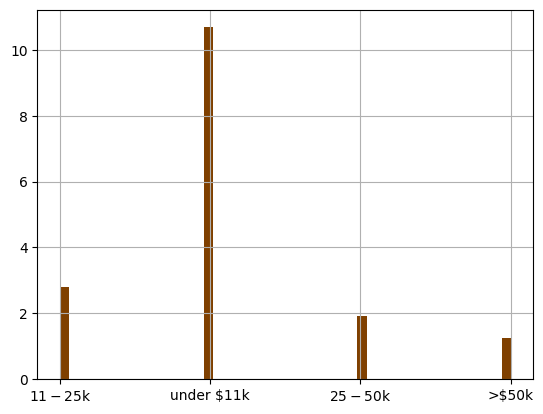

In [109]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Assuming 'df' contains the data you want to work with:
df['income'].fillna(df['income'].mode()[0], inplace=True)

# original data
df['income'].hist(bins=50, ax=ax, density=True, color='red')

# If 'totcst' is a column in 'df', you can plot it as well:
df['income'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.5)

plt.show()

#### Race

C:\Users\Theopan gerard\AppData\Local\Temp\ipykernel_30204\3975116847.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna(df['race'].mode()[0], inplace=True)


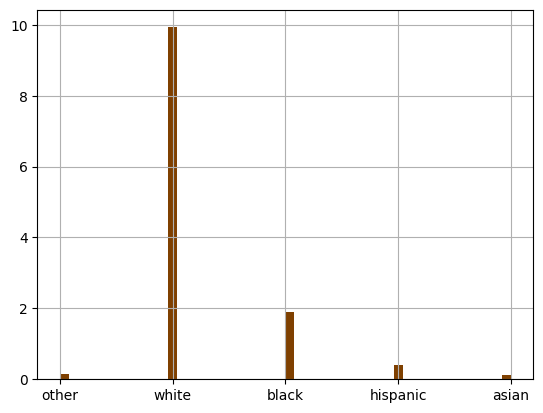

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Assuming 'df' contains the data you want to work with:
df['race'].fillna(df['race'].mode()[0], inplace=True)

# original data
df['race'].hist(bins=50, ax=ax, density=True, color='red')

# If 'totcst' is a column in 'df', you can plot it as well:
df['race'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.5)

plt.show()

#### dnr

C:\Users\Theopan gerard\AppData\Local\Temp\ipykernel_30204\3604998109.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dnr'].fillna(df['dnr'].mode()[0], inplace=True)


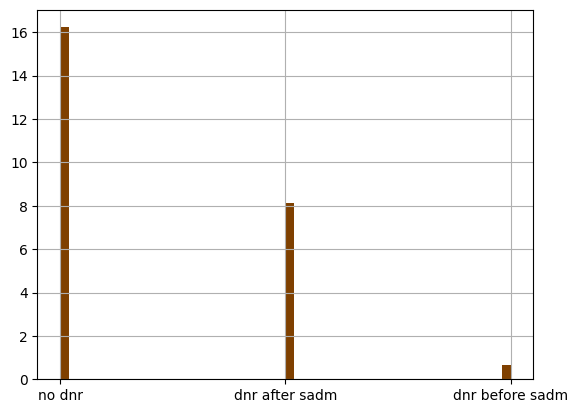

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Assuming 'df' contains the data you want to work with:
df['dnr'].fillna(df['dnr'].mode()[0], inplace=True)

# original data
df['dnr'].hist(bins=50, ax=ax, density=True, color='red')

# If 'totcst' is a column in 'df', you can plot it as well:
df['dnr'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.5)

plt.show()

In [95]:
# fig = plt.figure()
# ax = fig.add_subplot(111)

# # Assuming 'df' contains the data you want to work with:
# df['sfdm2'].fillna(df['sfdm2'].mode()[0], inplace=True)

# # original data
# df['sfdm2'].hist(bins=50, ax=ax, density=True, color='red')

# # If 'totcst' is a column in 'df', you can plot it as well:
# df['sfdm2'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.5)

# plt.show()

###
`Pada handling Measing Values data  distribusi tidak berubah setelah di imputasi pada data numerik adalah mean imputasi, kami memodifikasi dengan imputasi by target dan untuk data kategorikal mengunakan imputasi modus`

### Handling Measing Values dan Outlier

In [212]:
numeric_col_missing = df.select_dtypes(include=['number']).columns

# Loop untuk setiap kolom numerik
for col in numeric_col_missing:

    df[col] = df.groupby('death')[col].transform(lambda x: x.fillna(x.mean()))

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Menggunakan modus (nilai yang paling sering muncul) untuk mengisi nilai NaN
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Jumlah Outliers Sebelum Handling pada Kolom Tertentu:
charges    935
totcst     911
totmcst    721
dtype: int64


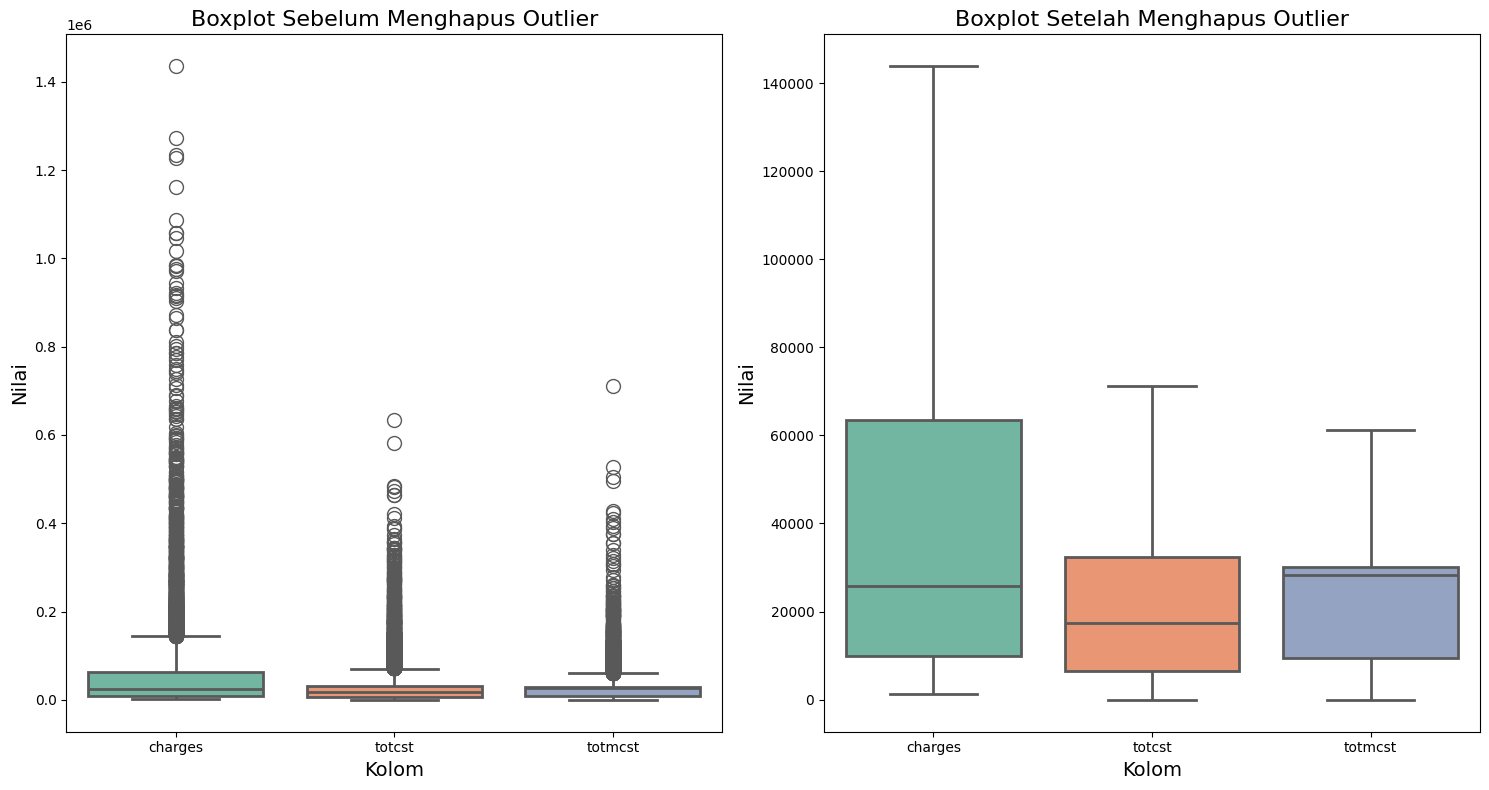

Jumlah baris data setelah menghapus outlier pada kolom tertentu: 9105


In [213]:

df_out = df.copy()


selected_columns = ['charges', 'totcst','totmcst'] 


Q1 = df_out[selected_columns].quantile(0.25)
Q3 = df_out[selected_columns].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_out[selected_columns] = df_out[selected_columns].apply(
    lambda col: col.clip(lower=lower_bound[col.name], upper=upper_bound[col.name])
)

outliers_before = ((df[selected_columns] < lower_bound) | (df[selected_columns] > upper_bound))
print("Jumlah Outliers Sebelum Handling pada Kolom Tertentu:")
print(outliers_before.sum())
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[selected_columns], palette="Set2", fliersize=10, linewidth=2)
plt.title("Boxplot Sebelum Menghapus Outlier", fontsize=16)
plt.xlabel("Kolom", fontsize=14)
plt.ylabel("Nilai", fontsize=14)
plt.subplot(1, 2, 2)
sns.boxplot(data=df_out[selected_columns], palette="Set2", fliersize=10, linewidth=2)
plt.title("Boxplot Setelah Menghapus Outlier", fontsize=16)
plt.xlabel("Kolom", fontsize=14)
plt.ylabel("Nilai", fontsize=14)

# Tampilkan plot
plt.tight_layout()
plt.show()

# Menampilkan data yang sudah diproses
print(f"Jumlah baris data setelah menghapus outlier pada kolom tertentu: {df_out.shape[0]}")


In [214]:
df = df_out.astype({col: 'category' for col in df.select_dtypes(include=['object']).columns})

## Model

In [215]:
from sklearn.decomposition import PCA
X = df.drop(columns=['death'])  # Fitur
y = df['death']  # Target klasifikasi

categorical_cols = X.select_dtypes(include=['object', 'category']).columns
print("Kolom Kategorikal:", categorical_cols)

label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

scalar = StandardScaler()
x_scaled= scalar.fit_transform(X.select_dtypes(include=[np.number]))

Kolom Kategorikal: Index(['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr'], dtype='object')


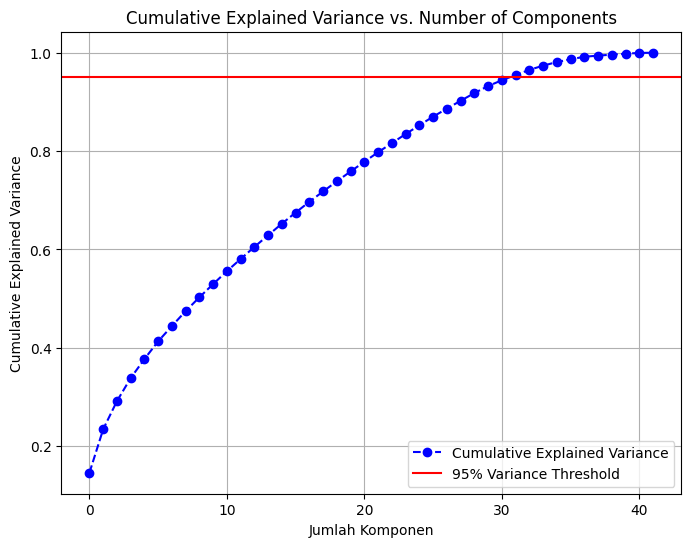

Jumlah komponen optimal untuk mencapai 95% variansi: 32


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=x_scaled.shape[1])
pca.fit(x_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,6))

plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b', label='Cumulative Explained Variance')

plt.axhline(y=0.95, color='r', linestyle='-', label="95% Variance Threshold")

plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

cumulative_variance = np.cumsum(explained_variance)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Jumlah komponen optimal untuk mencapai 95% variansi: {optimal_components}")

#### tanpa handling outlier

In [ ]:
pca = PCA(n_components=28)
X_pca = pca.fit_transform(x_scaled)

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

param_grid = {'n_neighbors': np.arange(1, 20), 'weights': ['uniform', 'distance',], 'metric': ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)
y_train_pred = best_knn.predict(X_train)


train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"🔹 Accuracy on Training Data: {train_accuracy:.4f}")

y_pred = best_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Best K: {grid_search.best_params_}")
print(f"🔹 Accuracy on Test Data: {accuracy:.4f}")
print("🔹 Classification Report: \n", classification_report(y_test, y_pred))


🔹 Accuracy on Training Data: 1.0000
🔹 Best K: {'metric': 'manhattan', 'n_neighbors': np.int64(19), 'weights': 'distance'}
🔹 Accuracy on Test Data: 0.8276
🔹 Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.66      0.69       537
           1       0.86      0.90      0.88      1284

    accuracy                           0.83      1821
   macro avg       0.80      0.78      0.79      1821
weighted avg       0.82      0.83      0.83      1821



In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

knn = KNeighborsClassifier()  
knn.fit(X_train, y_train)


y_train_pred = knn.predict(X_train)


train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"🔹 Accuracy on Training Data: {train_accuracy:.4f}")


y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Accuracy on Test Data: {accuracy:.4f}")

print("🔹 Classification Report: \n", classification_report(y_test, y_pred))


🔹 Accuracy on Training Data: 0.8383
🔹 Accuracy on Test Data: 0.7727
🔹 Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.61      0.61       537
           1       0.84      0.84      0.84      1284

    accuracy                           0.77      1821
   macro avg       0.73      0.73      0.73      1821
weighted avg       0.77      0.77      0.77      1821



### Handling Outlier

In [ ]:
pca = PCA(n_components=28)
X_pca = pca.fit_transform(x_scaled)

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

param_grid = {'n_neighbors': np.arange(1, 20), 'weights': ['uniform', 'distance',], 'metric': ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)
y_train_pred = best_knn.predict(X_train)


train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"🔹 Accuracy on Training Data: {train_accuracy:.4f}")

y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Best K: {grid_search.best_params_}")
print(f"🔹 Accuracy on Test Data: {accuracy:.4f}")
print("🔹 Classification Report: \n", classification_report(y_test, y_pred))


🔹 Accuracy on Training Data: 1.0000
🔹 Best K: {'metric': 'manhattan', 'n_neighbors': np.int64(17), 'weights': 'distance'}
🔹 Accuracy on Test Data: 0.8248
🔹 Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.66      0.69       537
           1       0.86      0.89      0.88      1284

    accuracy                           0.82      1821
   macro avg       0.79      0.78      0.78      1821
weighted avg       0.82      0.82      0.82      1821



In [218]:

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"🔹 Accuracy on Training Data: {train_accuracy:.4f}")
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Accuracy on Test Data: {accuracy:.4f}")
print("🔹 Classification Report: \n", classification_report(y_test, y_pred))

🔹 Accuracy on Training Data: 1.0000
🔹 Accuracy on Test Data: 0.7721
🔹 Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.61      0.61       537
           1       0.84      0.84      0.84      1284

    accuracy                           0.77      1821
   macro avg       0.73      0.72      0.72      1821
weighted avg       0.77      0.77      0.77      1821



### Mengunakan PCA

In [188]:
pca = PCA(n_components=28)
X_pca = pca.fit_transform(x_scaled)

# Pisahkan data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

# Membangun model K-Nearest Neighbors (KNN)
param_grid = {'n_neighbors': np.arange(1, 20), 'weights': ['uniform', 'distance',], 'metric': ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)
y_train_pred = best_knn.predict(X_train)


train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"🔹 Accuracy on Training Data: {train_accuracy:.4f}")

# Prediksi untuk data pengujian (X_test)
y_pred = best_knn.predict(X_test)

# Menghitung akurasi pada data pengujian
accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 Best K: {grid_search.best_params_}")
print(f"🔹 Accuracy on Test Data: {accuracy:.4f}")
print("🔹 Classification Report: \n", classification_report(y_test, y_pred))

🔹 Accuracy on Training Data: 1.0000
🔹 Best K: {'metric': 'euclidean', 'n_neighbors': np.int64(12), 'weights': 'distance'}
🔹 Accuracy on Test Data: 0.7528
🔹 Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.30      0.39        23
           1       0.79      0.91      0.85        66

    accuracy                           0.75        89
   macro avg       0.66      0.61      0.62        89
weighted avg       0.72      0.75      0.73        89

